Showing Robot Using Geometry


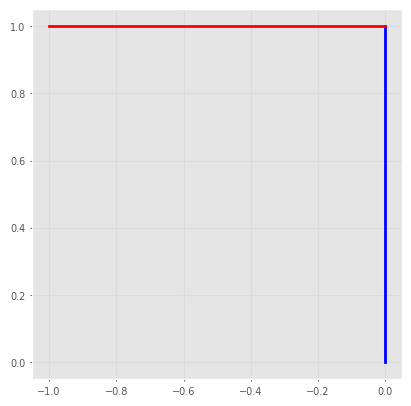

(-0.9999999999999999, 1.0000000000000002)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the joint angles and link lengths
theta1 = np.pi/2
theta2 = np.pi/2
L1 = 1
L2 = 1
def plotRobot(L1, L2, theta1, theta2):
    x1 = L1*np.cos(theta1)
    y1 = L1*np.sin(theta1)
    x2 = x1 + L2*np.cos(theta1+theta2)
    y2 = y1 + L2*np.sin(theta1+theta2)

    fig, ax = plt.subplots()
    ax.plot([0, x1], [0, y1], 'b-', lw=2)  # First link
    ax.plot([x1, x2], [y1, y2], 'r-', lw=2)  # Second link
    ax.set_aspect('equal')
    print("Showing Robot Using Geometry")
    plt.show()
    return x2,y2
GROUND_TRUTH = plotRobot(L1, L2, theta1, theta2)
print(GROUND_TRUTH)

In [4]:
import tensorflow as tf

2023-04-29 18:03:19.513656: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
def TP(x,y):
    """
        Prismatic Transformation by x,y
    """
    return np.array([[1,0,x],[0,1,y],[0,0,1]])
def TPx(x):
    return TP(x,0)
def TR(A):
    """
        Resolute Transformation by thetA
    """
    return np.array([[np.cos(A), -np.sin(A), 0],[np.sin(A), np.cos(A), 0],[0,0,1]])

Thinking:
![2d_forward_kinematics_thought_process](assets/2d_forward_kinematics_thought_process.png)
*Step by Step how I got this result*

In [8]:
#Result from the equation (note how we start at the origin)
myResult = TR(theta1)@TPx(L1)@TR(theta2)@TPx(L2)@np.array([0,0,1])
myResult

array([-1.,  1.,  1.])

Showing the Ground Truth with extra rotation dimension

In [10]:
x = list(GROUND_TRUTH) #We add a 1 since the original ground truth doesnt have a rotation dimension
x.append(1)
x

[-0.9999999999999999, 1.0000000000000002, 1]

They are equivalent

In [12]:
np.all(np.isclose(x,myResult))

True

# PyTorch

In [34]:
import torch
import numpy as np

# Define the joint angles and link lengths
theta1 = np.pi/2
theta2 = np.pi/2
L1 = 1.0
L2 = 1.0

def TP(x,y):
    """
        Prismatic Transformation by x,y
    """
    x = torch.tensor([x])
    y = torch.tensor([y])
    return torch.tensor([[1,0,x],[0,1,y],[0,0,1]])

def TPx(x):
    return TP(x,0)

def TR(A):
    """
        Resolute Transformation by theta
    """
    A = torch.tensor([A])
    return torch.tensor([[torch.cos(A), -torch.sin(A), 0],[torch.sin(A), torch.cos(A), 0],[0,0,1]])

#Result from the equation (note how we start at the origin)
start = torch.tensor([0.0,0.0,1.0], requires_grad=True).unsqueeze(1)
myResult = TR(theta1)
myResult = myResult@TPx(L1)
myResult = myResult@TR(theta2)@TPx(L2)@start
myResult

tensor([[-1.0000],
        [ 1.0000],
        [ 1.0000]], grad_fn=<MmBackward0>)

In [37]:
myResult = myResult.squeeze().detach().numpy()
myResult

array([-1.        ,  0.99999994,  1.        ], dtype=float32)

In [38]:
np.isclose(myResult, x)

array([ True,  True,  True])